# Oasis Infobyte Internship


### Task 1:EDA On Retail Sales Data 
### Auth:Sagar
### Domain:Data analytics
### Batch:January-25

### Approach:
   The goal is to perform exploratory data analysis to uncover patterns,
   trends and insights that can help the retail business make inform decision

### procedure:
#### Step1:Data loading and cleaning
#### Step2:Descriptive Statistics
#### Step3:Time series analysis
#### Step4:customer and product analysis
#### step5:Visualization


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#load the dataset
data=pd.read_csv('E:/internship/retail_sales_dataset.csv')

In [3]:
#overview
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
#2.Descriptive statistics
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
data.duplicated() #check data value

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [17]:
#3.time series analysis
data['Date'] = pd.to_datetime(data['Date']) #convert date to datetime formate
data.set_index('Date', inplace=True)


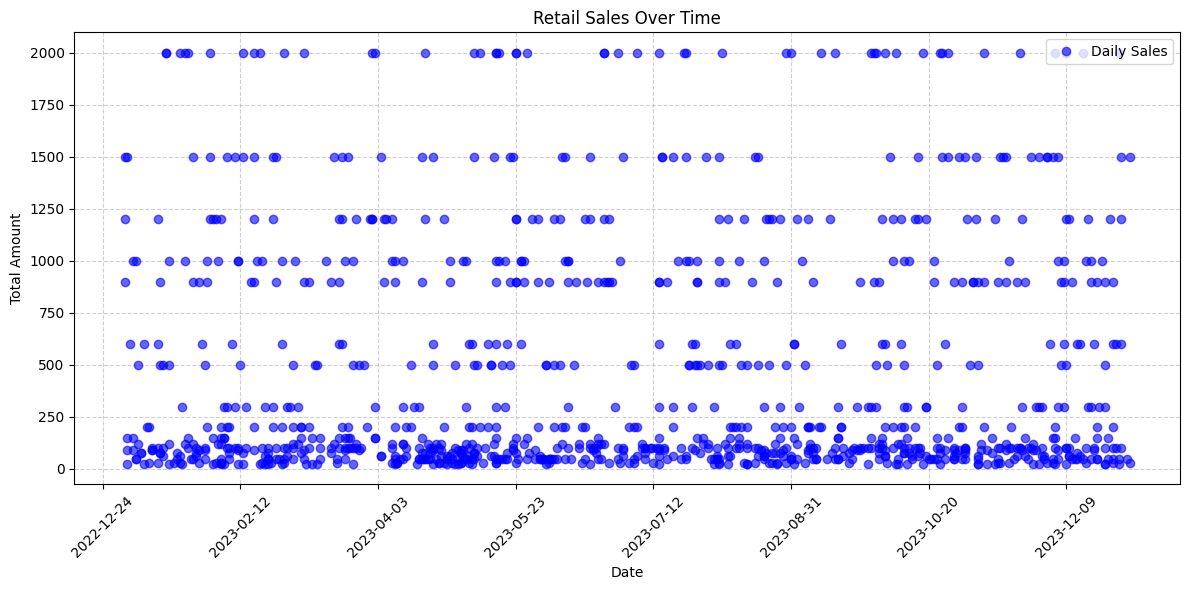

In [10]:
#retail sales over time
plt.figure(figsize=(12, 6))
plt.plot(data['Total Amount'], label='Daily Sales', color='blue', marker='o', alpha=0.6, linestyle='None')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True, linestyle='--', alpha=0.6)

# Format the x-axis to show fewer ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show a maximum of 10 dates
plt.xticks(rotation=45)  # Rotate dates for readability
plt.legend()
plt.tight_layout()
plt.show()

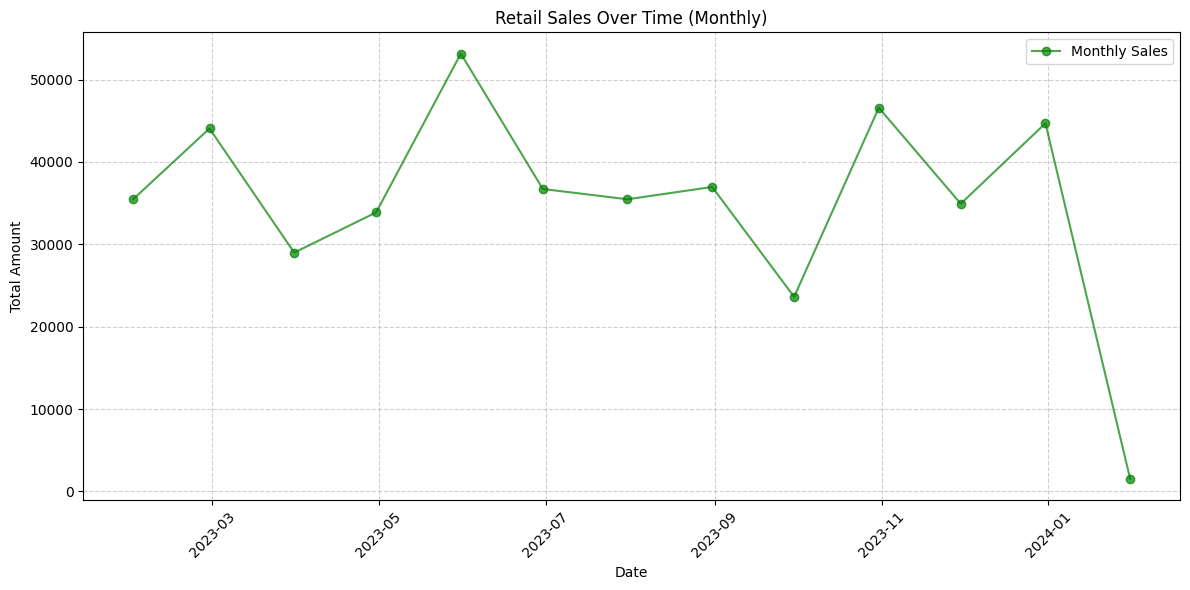

In [11]:
# Resample data to monthly sales (month-end frequency)
monthly_sales = data['Total Amount'].resample('ME').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales', color='green', marker='o', alpha=0.7)
plt.title('Retail Sales Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


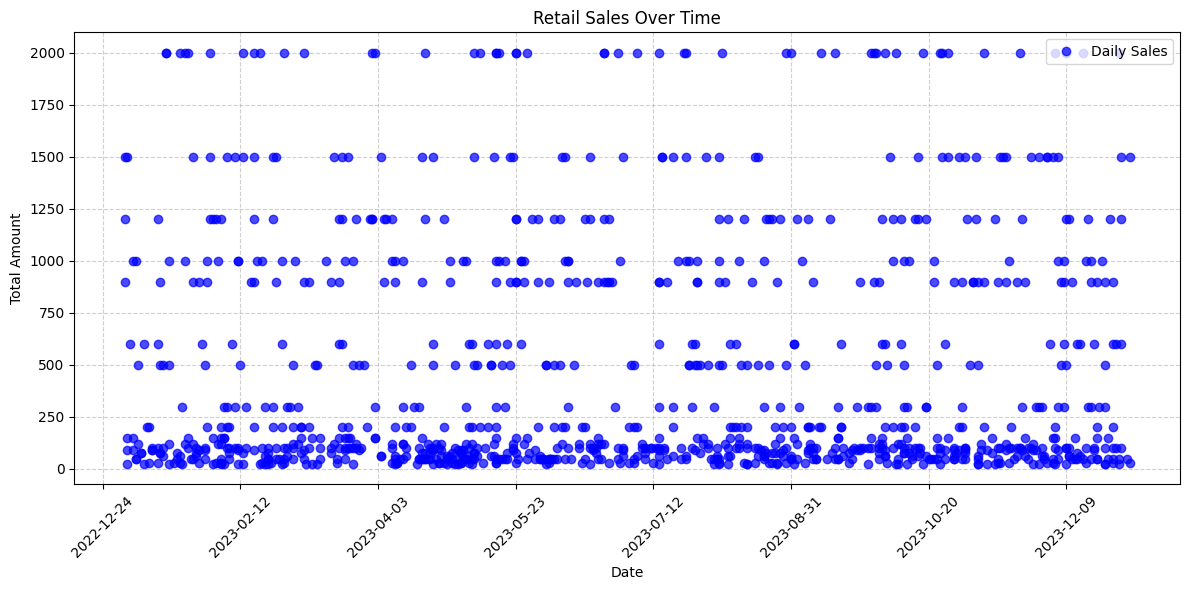

In [13]:
# Plot daily sales
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Amount'], label='Daily Sales', color='blue', marker='o', alpha=0.7, linestyle='None')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True, linestyle='--', alpha=0.6)

# Format the x-axis to show fewer ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show a maximum of 10 dates
plt.xticks(rotation=45)  # Rotate dates for readability

plt.legend()
plt.tight_layout()
plt.show()


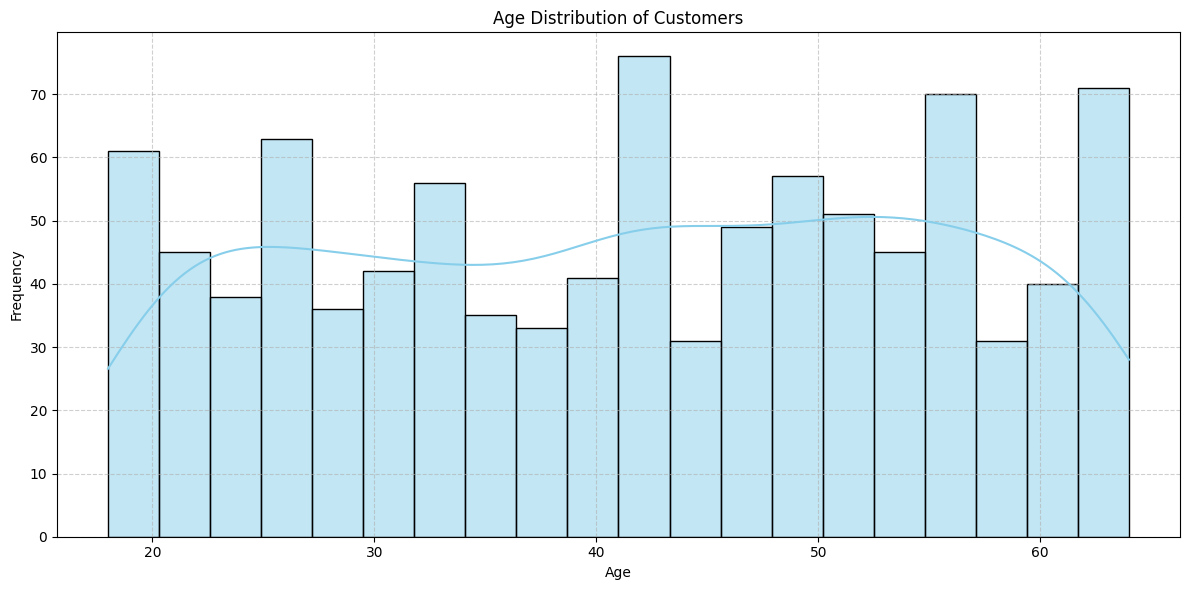

In [46]:
#4.customer and product analysis
#customer demographics & buying behavior
#Age Distribution of Customers
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


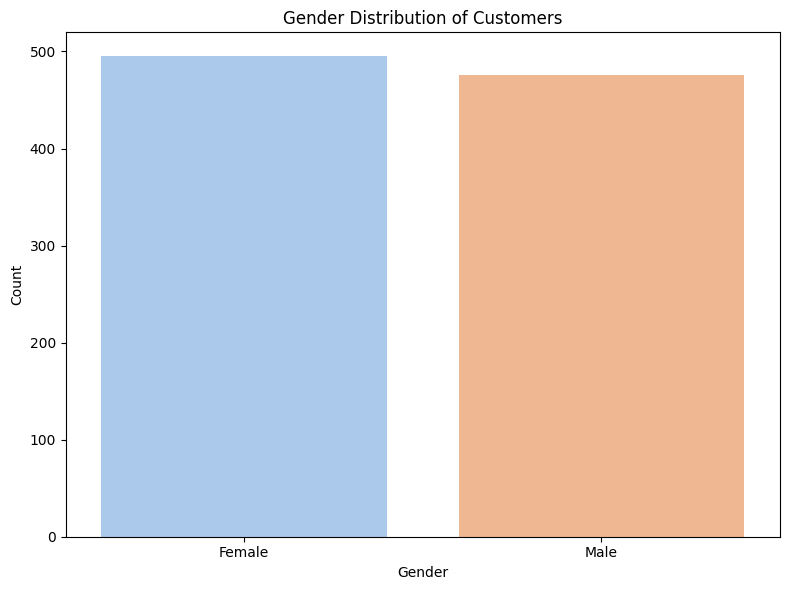

In [47]:
# Gender Distribution of Customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, hue='Gender', palette='pastel', legend=False)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


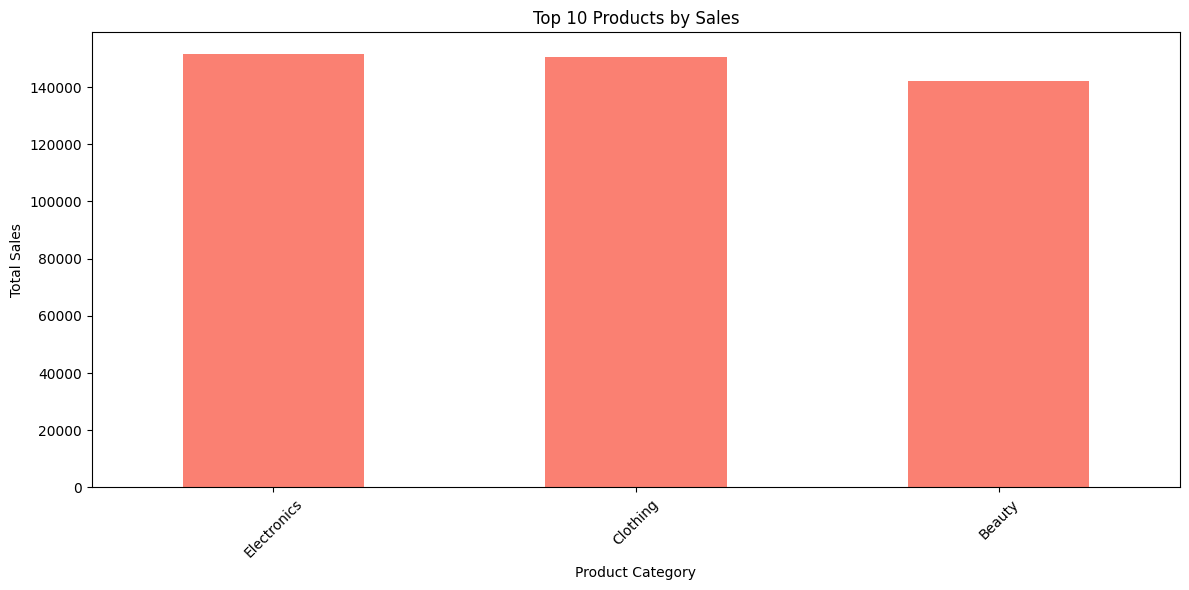

In [48]:
#product analysis
# Calculate total sales by product category
sales_by_product = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot the top 10 product categories
plt.figure(figsize=(12, 6))
sales_by_product.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


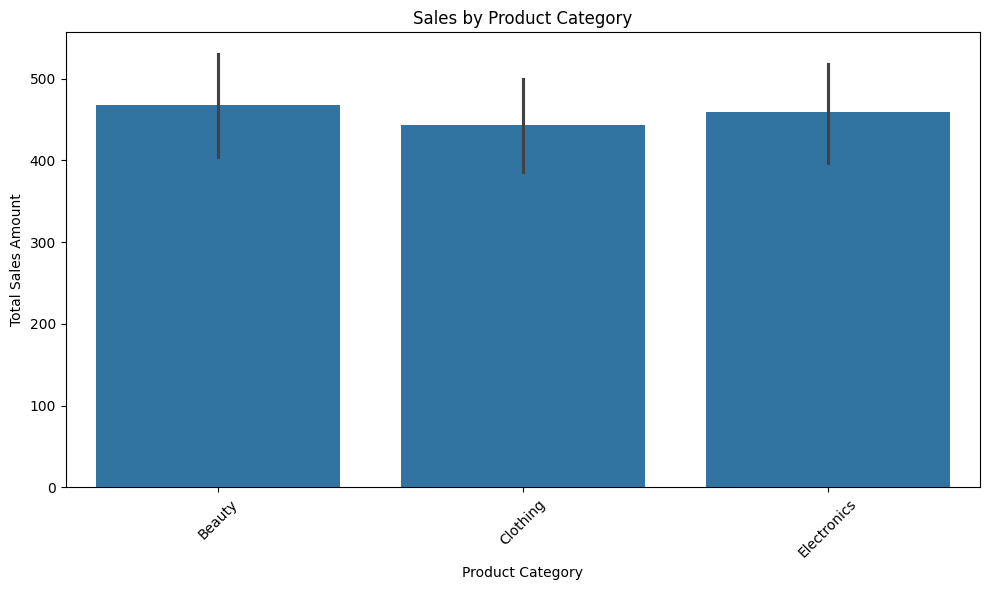

In [60]:
#5.visualization
#bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=data, hue=None)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
# Convert 'Date' column to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])


In [52]:
# Group by 'Date' and aggregate 'Total Amount' (sum or mean based on your needs)
data_aggregated = data.groupby('Date')['Total Amount'].sum().reset_index()

# Sort the data by 'Date' to ensure the line plot follows the correct sequence
data_aggregated.sort_values(by='Date', inplace=True)


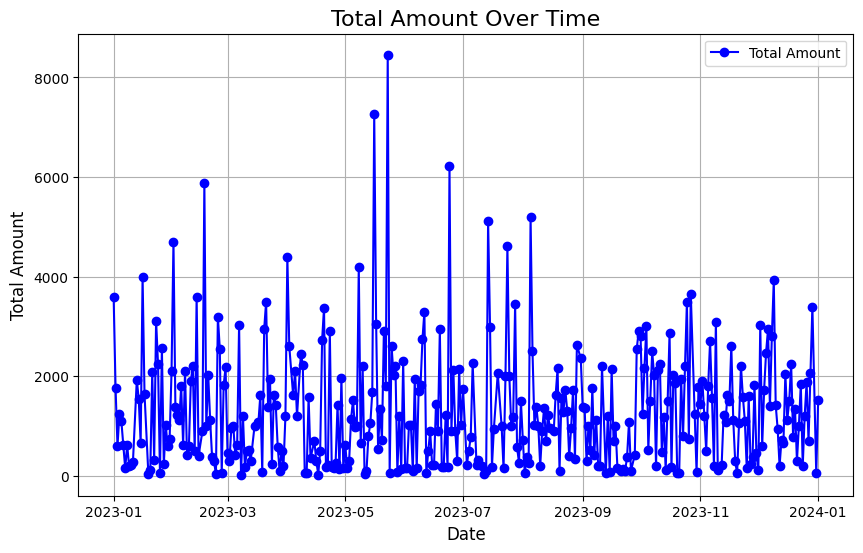

In [53]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df_aggregated['Date'], df_aggregated['Total Amount'], marker='o', linestyle='-', color='b', label='Total Amount')

# Add titles and labels to the plot
plt.title('Total Amount Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.grid(True)
plt.legend()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Transaction ID    1000 non-null   int64         
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


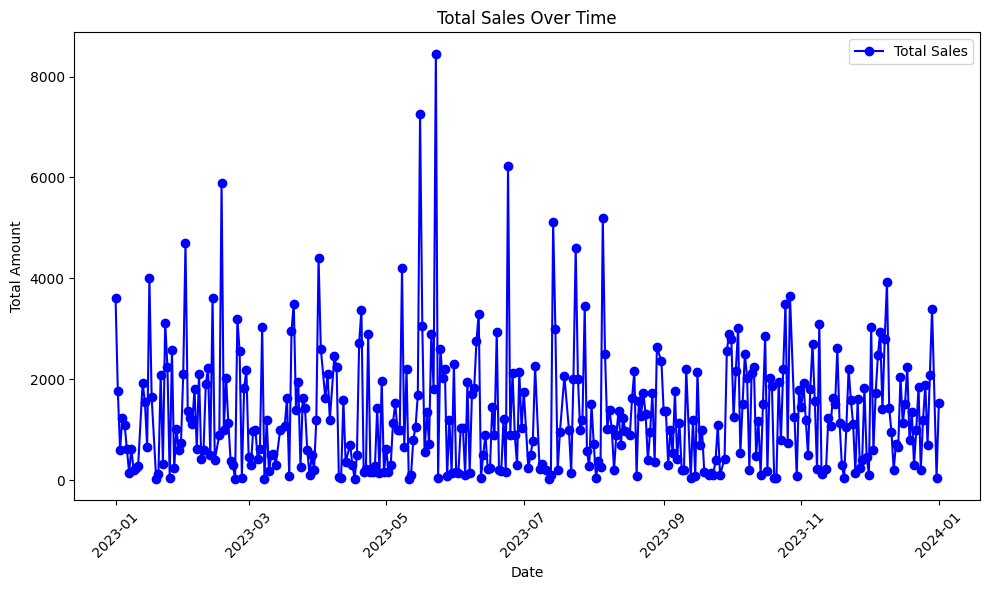

In [55]:
# Group by 'Date' and sum the 'Total Amount' for each date
daily_sales = data.groupby('Date')['Total Amount'].sum()

# Plot the daily total sales
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='b', label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
#heatmaps
# Calculate the correlation matrix of numerical columns
correlation_matrix = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()


In [58]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

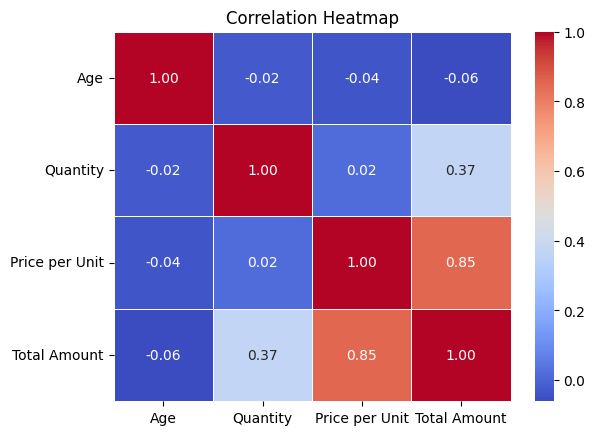

In [59]:
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()
